In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

%matplotlib inline

In [79]:
names = ["Class","Alcohol","Malic","Ash","Alcalinity","Magnesium","Tphenols","Flavanoids","phenols","Proanthocyanins","Color","Hue","OD280/OD315","Proline"]
dataset =  pd.read_csv("/home/calsoft/Desktop/Workspace/Dataset/Logistic regression/emg/wine.data",header=None,names=names)

In [80]:
dataset.head()

,Class,Alcohol,Malic,Ash,Alcalinity,Magnesium,Tphenols,Flavanoids,phenols,Proanthocyanins,Color,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [81]:
print(dataset.groupby('Class').size())

Class
1    59
2    71
3    48
dtype: int64


In [82]:
# Encode wine class 1 as itself and all others as 0
dataset.loc[dataset['Class'] != 1, 'Class'] = 0

/home/calsoft/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/calsoft/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/calsoft/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/calsoft/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwa

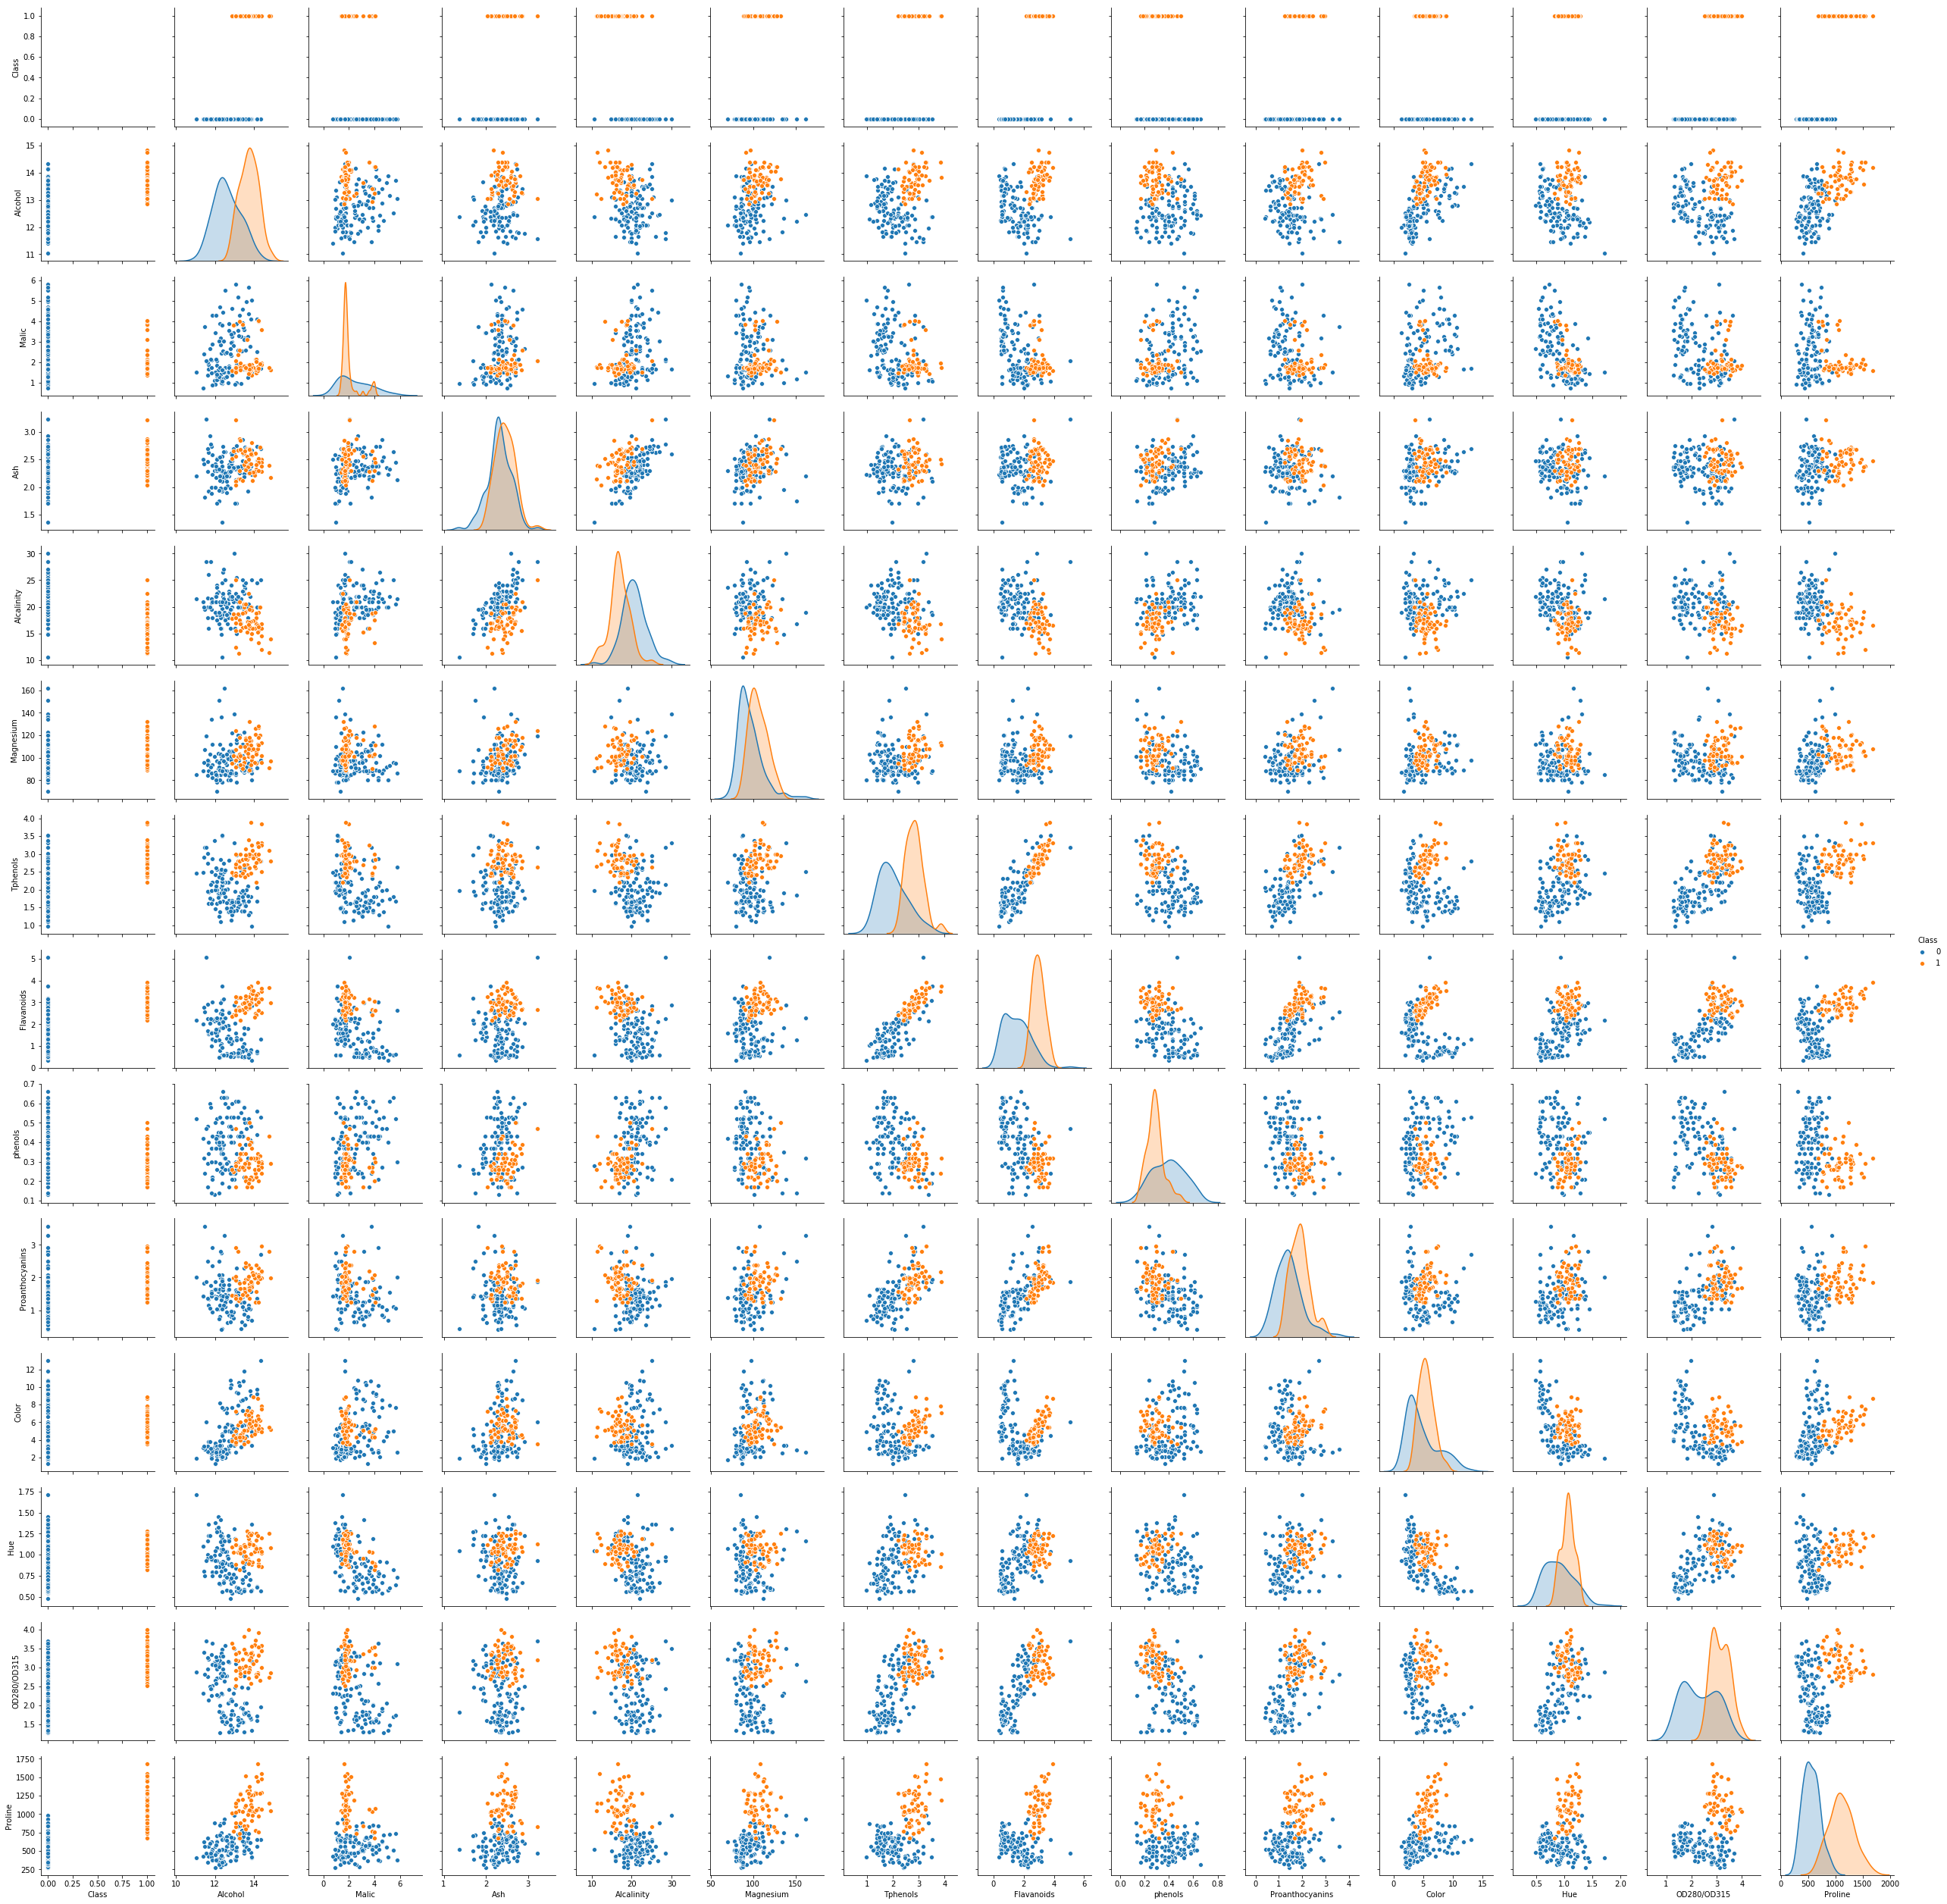

In [7]:
# Plotting the variables against each other 
sns.pairplot(dataset,hue = 'Class')

In [83]:
#x = dataset.iloc[:,[1,7]]
#y = dataset.iloc[:,0]

x = np.array(dataset[['Alcohol','Flavanoids']])
y = np.array(dataset['Class'])

print(x[:5])
print(y[:5])

[[14.23  3.06]
 [13.2   2.76]
 [13.16  3.24]
 [14.37  3.49]
 [13.24  2.69]]
[1 1 1 1 1]


In [84]:
print(x[:1])

[[14.23  3.06]]


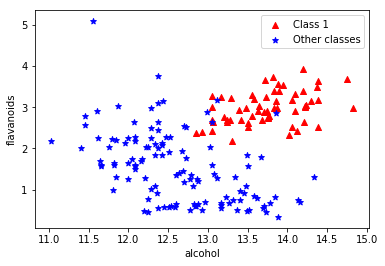

In [89]:
plt.scatter(x[y == 1, 0],x[y == 1, 1],label='Class 1',marker='^',color='red')   
plt.scatter(x[y == 0, 0],x[y == 0, 1],label='Other classes',marker='*',color='blue') 
## for Numpy array : 'y'==0 or 'y'== 1 returns boolean array .Using this boolean array as index numpy array returns only
## that row which have a label of 0 or 1.
## '1' after the 'y==0' or 'y==1' here represents the first column. 

plt.xlabel('alcohol')
plt.ylabel('flavanoids')
plt.legend()
plt.show()

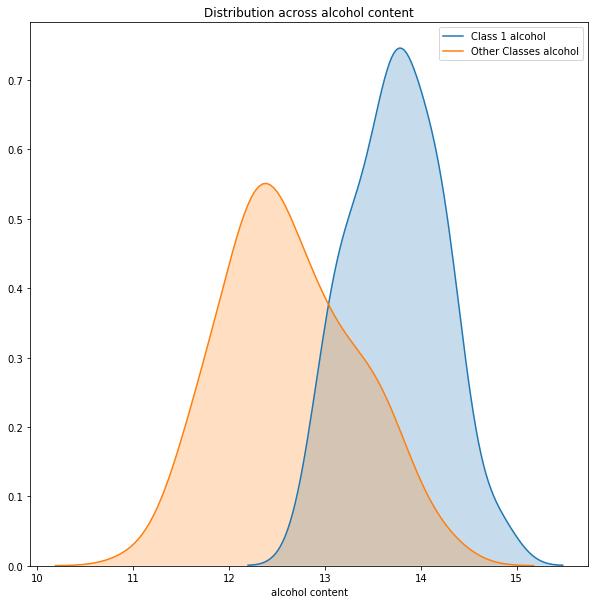

In [102]:
plt.figure(figsize=(10,10))
sns.kdeplot(x[y == 1,0], label='Class 1 alcohol', shade = True) # Fit and plot a univariate or bivariate kernel density estimate
sns.kdeplot(x[y == 0,0], label='Other Classes alcohol',shade = True)
plt.title('Distribution across alcohol content')
plt.xlabel('alcohol content')
plt.legend()
plt.show()

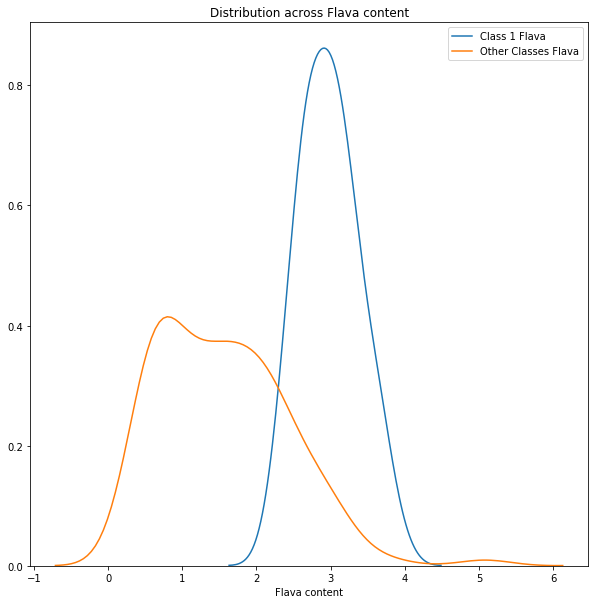

In [103]:
plt.figure(figsize=(10,10))
sns.kdeplot(x[y == 1,1], label='Class 1 Flava')
sns.kdeplot(x[y == 0,1], label='Other Classes Flava')
plt.title('Distribution across Flava content')
plt.xlabel('Flava content')
plt.legend()
plt.show()

In [105]:
from sklearn.model_selection import train_test_split
# Split into training and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [118]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = 1000)
log_reg.fit(x_train,y_train)

/home/calsoft/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [115]:
log_reg.predict(x_test)

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0])

In [108]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_score
print(log_reg.score(x_train,y_train))

0.8490566037735849


In [109]:
print(log_reg.score(x_test,y_test))

0.8194444444444444


In [119]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_score
print(log_reg.score(x_train,y_train))

0.9716981132075472


In [120]:
print(log_reg.score(x_test,y_test))

0.875


In [129]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)

tree.fit(x_train, y_train)
yPredTree = tree.predict(x_test)
score = accuracy_score(y_test,yPredTree)
print("{%0.2f}"%(score))

{0.94}
